In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('whitegrid')
sns.set_palette('GnBu_d')

In [3]:
df = pd.read_csv("weatherAUS.csv")

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
df['Month'] = df['Date'].str.split('-').str[1]

In [6]:
def Month_X(x):
    if x == "01":
        x = 3 ** 0.5 / 2
    elif x == "02":
        x = 1 / 2
    elif x == "03":
        x = 0
    elif x == "04":
        x = -1 / 2
    elif x == "05":
        x = -3 ** 0.5 / 2
    elif x == "06":
        x = -1
    elif x == "07":
        x = -3 ** 0.5 / 2
    elif x == "08":
        x = -1 / 2
    elif x == "09":
        x = 0
    elif x == "10":
        x = 1 / 2
    elif x == "11":
        x = 3 ** 0.5 / 2
    else:
        x = 1
    return x

In [7]:
df['Month_X'] = df['Month'].apply(Month_X)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Month_X
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142193.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2.360682,-0.016356
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,8.477969,0.708664
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000,-1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000,-0.866025
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000,0.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,0.800000,0.500000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,371.000000,1.000000


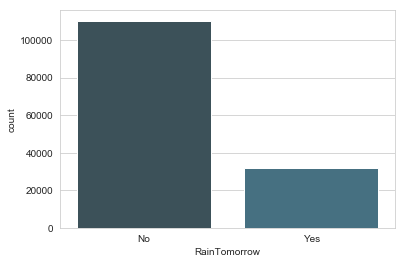

In [10]:
sns.countplot(df['RainTomorrow'])

In [11]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'Month', 'Month_X'],
      dtype='object')

In [12]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RISK_MM           681
RainTomorrow        2
Month              12
Month_X             7
dtype: int64

In [13]:
df.groupby(['Cloud9am'])['Cloud9am'].count()

Cloud9am
0.0     8642
1.0    15687
2.0     6500
3.0     5914
4.0     4420
5.0     5567
6.0     8171
7.0    19972
8.0    14697
9.0        2
Name: Cloud9am, dtype: int64

In [14]:
df.groupby(['Evaporation'])['Evaporation'].count().head()

Evaporation
0.0    244
0.1      8
0.2    503
0.3     10
0.4    769
Name: Evaporation, dtype: int64

In [15]:
df.groupby(['Sunshine'])['Sunshine'].count().head()

Sunshine
0.0    2359
0.1     542
0.2     521
0.3     433
0.4     326
Name: Sunshine, dtype: int64

In [16]:
df.groupby(['RISK_MM'])['RISK_MM'].count().head()

RISK_MM
0.0    91077
0.1      157
0.2     8762
0.3       65
0.4     3781
Name: RISK_MM, dtype: int64

In [17]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'Month', 'Month_X'],
      dtype='object')

In [18]:
df = df.drop('RISK_MM', axis=1)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Month_X
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12,1.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12,1.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12,1.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12,1.0


In [19]:
category_cols = {"RainToday": {"No": 0, "Yes": 1},
                "RainTomorrow": {"No": 0, "Yes": 1}}
df.replace(category_cols, inplace=True)

In [20]:
category_cols2 = {"Location": {np.nan: "Missing"},
                 "WindGustDir": {np.nan: "Missing"},
                 "WindDir9am": {np.nan: "Missing"},
                 "WindDir3pm": {np.nan: "Missing"}}
df.replace(category_cols2, inplace=True)

In [21]:
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 
                 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']
# df[numeric_cols].apply(lambda x: x.fillna(x.mean()),axis=0)
df[numeric_cols] = df[numeric_cols].fillna((df[numeric_cols].mean()))
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Month_X
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0,12,1.0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0,12,1.0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0,12,1.0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0,12,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0,12,1.0


In [22]:
df.dropna(axis = 0, inplace=True)

# Logistic regression and KNN

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df.drop(['Date', 'RainTomorrow', 'Month'], axis=1)
y = df['RainTomorrow']

In [43]:
category_cols3 = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [44]:
X = pd.get_dummies(X, columns=category_cols3, drop_first=True)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [46]:
# train_mean = X_train.mean()
# train_std = X_train.std()
# X_train = (X_train - train_mean)/train_std
# X_test = (X_test - train_mean)/train_std

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [48]:
from sklearn.metrics import f1_score, classification_report

In [49]:
models = {'Logistic_Regression': LogisticRegression(class_weight='balanced'),
          'KNN': KNeighborsClassifier(n_neighbors=7)}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    #print(model_name, f1_score(y_test, predict))
    print(model_name)
    print(classification_report(y_test, predict))
    print("====================\n")

Logistic_Regression
             precision    recall  f1-score   support

        0.0       0.93      0.80      0.86     16423
        1.0       0.53      0.78      0.64      4696

avg / total       0.84      0.80      0.81     21119


KNN
             precision    recall  f1-score   support

        0.0       0.87      0.94      0.90     16423
        1.0       0.71      0.49      0.58      4696

avg / total       0.83      0.84      0.83     21119




In [41]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(models['Logistic_Regression'].fit(X_train,y_train), X, y, cv= 5)
score.mean()

0.6865260814802182

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [33]:
n_neighbors = [7, 8, 9, 10]

param_grid = {'n_neighbors': n_neighbors}

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
gs_rf = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring='f1',
            cv=2, verbose=1)

In [36]:
gs_rf.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 59.7min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [7, 8, 9, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1', verbose=1)

In [37]:
test_predictions = gs_rf.predict(X_test)
train_predictions = gs_rf.predict(X_train)
print("TRAIN:")
print(classification_report(y_train, train_predictions))
print("TEST:")
print(classification_report(y_test, test_predictions))

TRAIN:
             precision    recall  f1-score   support

        0.0       0.88      0.96      0.92     93163
        1.0       0.78      0.55      0.64     26505

avg / total       0.86      0.87      0.86    119668

TEST:
             precision    recall  f1-score   support

        0.0       0.86      0.95      0.90     16423
        1.0       0.72      0.48      0.58      4696

avg / total       0.83      0.84      0.83     21119



In [38]:
gs_rf.best_params_

{'n_neighbors': 9}